In [2]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [42]:
#Définir la constante de gravitation universelle 
G = 0.0000000067 # N-m2 / kg2
# Quantités de référence 
m_nd = 1.989e+30 #kg # masse du soleil 
r_nd = 5.326e+12 #m # distance entre les étoiles dans Alpha Centauri 
v_nd = 30000 # m / s # vitesse relative de la terre autour du soleil 
t_nd = 79.91 * 365 * 24 * 3600 * 0.51 #s # période orbitale d'Alpha Centauri
# Constantes nettes 
K1 = G * t_nd * m_nd / (r_nd ** 2 * v_nd)
K2 = v_nd * t_nd / r_nd

In [104]:
#Définir les masses 
m1 = 1.1 #Alpha Centauri A 
m2 = 0.907 #Alpha Centauri B
#Définir les vecteurs de position initiale 
r1 = [- 0.5,0,0] #m 
r2 = [0.5,0,0] #m
#Convertir les vecteurs pos en tableaux 
r1 = sci.array (r1, dtype = "float64") 
r2 = sci.array (r2, dtype = "float64")
# Trouver le centre de masse 
r_com = (m1 * r1 + m2 * r2) / (m1 + m2)
#Définir les vitesses initiales 
v1 = [0.01,0.01,0] # m / s 
v2 = [- 0.05,0, -0.1] # m / s
#Convertir les vecteurs de vitesse en tableaux 
v1 = sci.array (v1, dtype = "float64") 
v2 = sci.array (v2, dtype = "float64")
# Trouver la vitesse de COM 
v_com = (m1 * v1 + m2 * v2) / (m1 + m2)

<ipython-input-104-9b096fa81ac1>:8: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r1 = sci.array (r1, dtype = "float64")
<ipython-input-104-9b096fa81ac1>:9: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r2 = sci.array (r2, dtype = "float64")
<ipython-input-104-9b096fa81ac1>:16: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v1 = sci.array (v1, dtype = "float64")
<ipython-input-104-9b096fa81ac1>:17: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v2 = sci.array (v2, dtype = "float64")


In [105]:
#Une fonction définissant les équations du mouvement 
def TwoBodyEquations (w, t, G, m1, m2): 
    r1 = w [: 3] 
    r2 = w [3: 6] 
    v1 = w [6: 9] 
    v2 = w [9 : 12]
    r = sci.linalg.norm (r2-r1) #Calculer la magnitude ou la norme du vecteur
    dv1bydt = K1 * m2 * (r2-r1) / r ** 3 
    dv2bydt = K1 * m1 * (r1-r2) / r ** 3 
    dr1bydt = K2 * v1 
    dr2bydt = K2 * v2
    r_derivs = sci.concatenate ((dr1bydt, dr2bydt)) 
    dérivés = sci.concatenate ((r_derivs, dv1bydt, dv2bydt)) 
    return  dérivés

In [106]:
#Package paramètres initiaux 
init_params = sci.array ([r1_sol, r2_sol, v1, v2]) #create array of initial params 
init_params = init_params.flatten () #flatten array pour le rendre 1D 
time_span = sci.linspace (0,8,500) # 8 périodes orbitales et 500 points
#Exécuter le solveur ODE 
import scipy.integrate
two_body_sol = sci.integrate.odeint (TwoBodyEquations, init_params, time_span, args = (G, m1, m2))

<ipython-input-106-580583a66bca>:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  init_params = sci.array ([r1_sol, r2_sol, v1, v2]) #create array of initial params
<ipython-input-106-580583a66bca>:4: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  time_span = sci.linspace (0,8,500) # 8 périodes orbitales et 500 points
<ipython-input-105-4604f94ac0e6>:12: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r_derivs = sci.concatenate ((dr1bydt, dr2bydt))
<ipython-input-105-4604f94ac0e6>:13: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  dérivés = sci.concatenate ((r_derivs, dv1bydt, dv2bydt))


In [107]:
r1_sol = two_body_sol [:,: 3] 
r2_sol = two_body_sol [:, 3: 6]

In [109]:
# Trouver l'emplacement de COM 
rcom_sol = (m1 * r1_sol + m2 * r2_sol) / (m1 + m2)
# Trouver l'emplacement d'Alpha Centauri A wrt COM 
r1com_sol = r1_sol-rcom_sol
# Trouver l'emplacement d'Alpha Centauri B par COM 
r2com_sol = r2_sol-rcom_sol

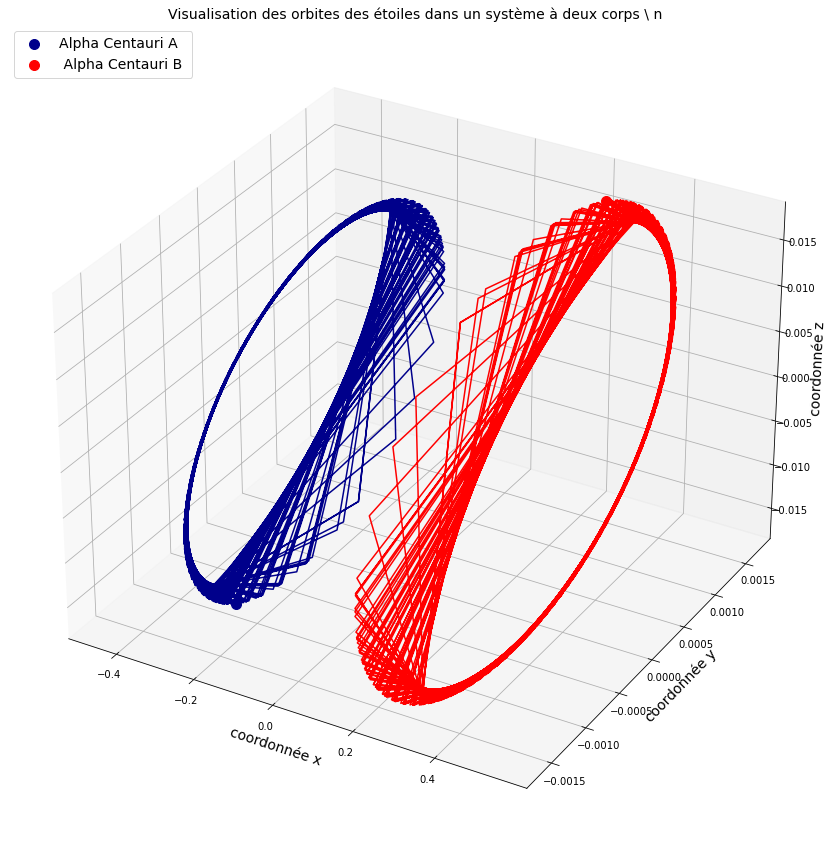

In [110]:
#Create figure 
fig = plt.figure (figsize = (15,15))
#Créer des axes 3D 
ax = fig.add_subplot (111, projection = "3d")
# Tracez les orbites 
ax.plot (r1com_sol [:, 0], r1com_sol [:, 1], r1com_sol [:, 2], color = "darkblue") 
ax.plot (r2com_sol [:, 0], r2com_sol [:, 1], r2com_sol [:, 2], color = "red")
# Tracez les positions finales des étoiles 
ax.scatter (r1com_sol [-1,0], r1com_sol [-1,1], r1com_sol [-1,2], color = "darkblue", marker = "o", s = 100, label = "Alpha Centauri A") 
ax.scatter (r2com_sol [-1,0], r2com_sol [-1,1], r2com_sol [-1,2], color = "red", marker = "o", s = 100, label =" Alpha Centauri B ")
# Ajoutez quelques cloches et sifflets supplémentaires 
ax.set_xlabel ("coordonnée x", fontsize = 14) 
ax.set_ylabel ("coordonnée y", fontsize = 14) 
ax.set_zlabel ("coordonnée z", fontsize = 14) 
ax.set_title ("Visualisation des orbites des étoiles dans un système à deux corps \ n", fontsize = 14) 
ax.legend (loc = "upper left", fontsize = 14)